In [1]:
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from generateXdata import generateX
import os
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_validate

from sklearn.linear_model import Ridge,RidgeCV
from sklearn.metrics import mean_squared_error


In [2]:

filename = os.path.join("dataforfinalproject","RECS_COMBINED_DATA.csv")
dataset=read_csv(filename)

In [3]:
dataset.describe()

,RECSYEAR,DOEID,REGIONC,DIVISION,TYPEHUQ,CELLAR,STORIES,PRKGPLC1,YEARMADE,OCCUPYY,...,WDPELLET,WDOTHER,WDWARM,WDWATER,USESOLAR,SOLWATER,SOLOTHER,TVAUDIOEQUIP,PCOFFEQUIP,PHONE
count,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,...,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000,21430.000000
mean,2008.789827,7205.857863,2.679888,5.453010,2.666636,0.126832,15.122912,0.468735,4.062529,6.808166,...,0.295194,-1.385768,0.112179,0.001260,0.009846,0.002427,0.006300,6.524078,2.665982,1.516472
std,4.803271,4406.168345,1.035783,2.806848,1.205252,2.300688,20.558255,2.286153,2.237875,2.003827,...,4.218022,0.927989,0.315594,0.035474,0.098740,0.049201,0.079121,3.612805,2.276647,1.118314
min,2001.000000,1.000000,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,1.000000,1.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2009.000000,3336.250000,2.000000,3.000000,2.000000,-2.000000,10.000000,0.000000,2.000000,6.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000
50%,2009.000000,6481.500000,3.000000,5.000000,2.000000,0.000000,10.000000,0.000000,4.000000,8.000000,...,-2.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,3.000000,2.000000
75%,2015.000000,11072.750000,4.000000,8.000000,3.000000,1.000000,20.000000,1.000000,6.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,4.000000,2.000000
max,2015.000000,15686.000000,4.000000,10.000000,5.000000,9.000000,99.000000,9.000000,13.000000,9.000000,...,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,23.000000,10.000000


In [4]:
#set_option('precision', 2)
#dataset.corr(method='spearman')

In [4]:
cost=dataset['TOTALDOLLAR']

energy_exp= dataset['TOTALBTU']

In [5]:
features,columns=generateX(True,'DOLLAR')

 X Features shape : (21430, 87)
y label shape : (21430,)
cols with values as 99 and -2: ['CELLAR', 'STORIES', 'PRKGPLC1', 'BEDROOMS', 'FUELPOOL', 'SIZRFRI1', 'TYPERFR1', 'AGERFRI1', 'SIZRFRI2', 'TYPERFR2', 'AGERFRI2', 'NUMFREEZ', 'SIZFREEZ', 'AGEFRZR', 'STOVENFUEL', 'OVENUSE', 'AMTMICRO', 'DWASHUSE', 'WASHLOAD', 'WASHTEMP', 'EQUIPM', 'FUELHEAT', 'EQUIPAGE', 'PROTHERM', 'TEMPHOME', 'TEMPGONE', 'TEMPNITE', 'AGECENAC', 'USECENAC', 'NUMBERAC', 'WWACAGE', 'USEWWAC', 'FUELH2O', 'WHEATAGE', 'WHEATSIZ', 'LGTOUTNUM', 'ESDISHW', 'PGASHEAT', 'WOODAMT'] 

Duplicate Count : 0
shape of X is (21430, 79)


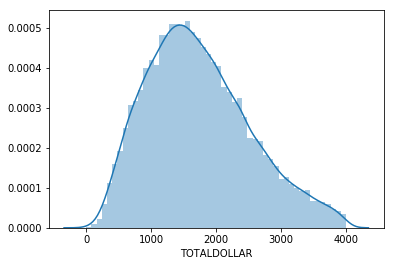

In [6]:
sns.distplot(dataset['TOTALDOLLAR']);

In [7]:
X=features

In [8]:
y = dataset['TOTALDOLLAR'].values.reshape(-1, 1)
#y =dataset['TOTALBTU'].values.reshape(-1, 1)

In [9]:
print(X.shape, y.shape)


(21430, 79) (21430, 1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30)

In [24]:
def linearmodel(X_train,y_train,X_test,y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions=model.predict(X_test)
    plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
    plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
    plt.xlabel("Predicted Y")
    plt.ylabel("Residual Error")
    plt.legend()
    plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
    plt.title("Residual Plot")
    plt.show()
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = model.score(X_test, y_test)
    column_series = list(predictions)
    df_modelresults=pd.DataFrame()
    df_modelresults = df_modelresults.assign(LinearPredictedY=column_series)
    print(f"MSE: {RMSE}, R2: {r2}")
    return(df_modelresults, RMSE, r2)

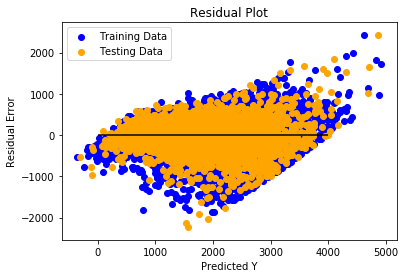

MSE: 346.4495036924357, R2: 0.8107907153572882


In [25]:
Linear_Predicted,RMSE,r2=linearmodel(X_train,y_train,X_test,y_test)

In [18]:
print(y_test.max())

14153.0


In [13]:
def classic_lasso_model(X_train,y_train, X_test,y_test):
    lasso = Lasso().fit(X_train, y_train)
    predictions_train = lasso.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    r2_train = lasso.score(X_train, y_train)
    predictions = lasso.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))
    r2_test= lasso.score(X_test, y_test)
    df_modelresults=pd.DataFrame(predictions,columns=['Classic_Lasso_predicted'])
    print(f"RMSE_classic_Lasso={RMSE_test},R2_Classic_Lasso={r2_test}")
    return(df_modelresults, RMSE_test,r2_test)

In [14]:
classic_lasso_predicted,RMSE_lasso,R2_Lasso=classic_lasso_model(X_train,y_train, X_test,y_test)

RMSE_classic_Lasso=346.90972535555017,R2_Classic_Lasso=0.8102876922740337


In [15]:
def lasso_CV(X,y,test_size,seed):
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    #lasso = Lasso(max_iter=10000, normalize=True)
    lassocv = LassoCV(alphas=N
                      one, cv=5, max_iter=100000, normalize=True)
    lassocv.fit(X_train, y_train)
    #lasso.set_params(alpha=lassocv.alpha_)
    print("Alpha=", lassocv.alpha_)
    #lasso.fit(X_train, y_train)
    print("best model coefficients:")
    pd.Series(lassocv.coef_)
    predictions = lassocv.predict(X_test)
    RMSE_test = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = lassocv.score(X_test, y_test)
    print(f"RMSE_Lasso_CV: {RMSE_test}, R2_Lasso_CV: {r2}")
    df_modelresults=pd.DataFrame(predictions,columns=['Lasso_CV_predicted'])
    return(df_modelresults,RMSE_test,r2)

In [16]:
Lasso_CV_predicted,RMSE_lasso_CV,R2_Lasso_CV=lasso_CV(X,y,0.2,30)

Alpha= 0.0038336724929266164
best model coefficients:
RMSE_Lasso_CV: 346.2504973834136, R2_Lasso_CV: 0.8110080227944444


In [60]:
model = Lasso()
alpha=np.arange(0.0,0.05,.003)
print(alpha)

[0.    0.003 0.006 0.009 0.012 0.015 0.018 0.021 0.024 0.027 0.03  0.033
 0.036 0.039 0.042 0.045 0.048]


In [61]:
param_grid = [{'alpha':alpha}]
pricing_grid  = GridSearchCV(model, param_grid, cv=5,scoring='r2')
pricing_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([0.   , 0.003, 0.006, 0.009, 0.012, 0.015, 0.018, 0.021, 0.024,
       0.027, 0.03 , 0.033, 0.036, 0.039, 0.042, 0.045, 0.048])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [62]:
pricing_grid.best_estimator_

Lasso(alpha=0.048, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
test_scores = pricing_grid.cv_results_
test_scores

{'mean_fit_time': array([2.47148924, 2.41911545, 2.43768907, 2.4395052 , 2.42307768,
        2.47311673, 2.44483075, 2.40899887, 2.4452312 , 2.45993705,
        2.39869852, 2.40894938, 2.49632206, 2.43246369, 2.43106623,
        2.67298679, 2.4451086 ]),
 'std_fit_time': array([0.14257311, 0.08705859, 0.1290342 , 0.09925854, 0.07727568,
        0.19010875, 0.138044  , 0.10860083, 0.13592364, 0.20235786,
        0.1279269 , 0.12010531, 0.17482408, 0.12702435, 0.12360233,
        0.16516727, 0.11021911]),
 'mean_score_time': array([0.00099497, 0.00096741, 0.00059876, 0.00113211, 0.00076566,
        0.00098009, 0.00076742, 0.00099783, 0.00095139, 0.00110464,
        0.00099072, 0.00097437, 0.00104833, 0.0009882 , 0.00113115,
        0.00119739, 0.00079021]),
 'std_score_time': array([6.23253710e-06, 2.60854769e-05, 4.88889132e-04, 2.69723966e-04,
        3.85420003e-04, 2.21759527e-05, 3.84497500e-04, 7.44843452e-07,
        5.89823857e-05, 3.02017281e-04, 1.50710719e-05, 4.61233420e-05,


In [64]:
print(pricing_grid.best_score_)

0.9636647633806548


In [65]:
predictions = pricing_grid.predict(X_test)

In [66]:
predictions

array([ 711.96853017, 5442.43138906, 3763.91894635, ..., 2824.16827007,
       1649.20992642,  796.84231635])

In [67]:
y_test

array([[ 724.],
       [5529.],
       [4314.],
       ...,
       [2727.],
       [1430.],
       [ 981.]])

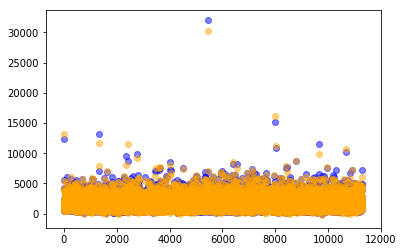

In [68]:
plt.scatter(range(len(predictions)), y_test, c="blue", marker='o',label="Actual Price",alpha=0.5)
plt.scatter(range(len(predictions)), predictions, c="orange",marker='o', label="Predicted Price",alpha=0.5)

In [20]:
alpha=np.arange(0.0,0.05,.003)
print(alpha)
enet = ElasticNet()
param_grid = [{'alpha':alpha}]
enet_grid  = GridSearchCV(enet, param_grid, cv=5)

enet_grid.fit(X_train, y_train)
ebest=enet_grid.best_estimator_

ebest.fit(X_train, y_train)
predictions = ebest.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
r2 = ebest.score(X_test, y_test)
#grid_results = pd.DataFrame(enet_grid.cv_results_) 
print(f" Elastinet Score: {r2, RMSE}")

[0.    0.003 0.006 0.009 0.012 0.015 0.018 0.021 0.024 0.027 0.03  0.033
 0.036 0.039 0.042 0.045 0.048]
 Elastinet Score: (0.8107873507739053, 346.45258401976565)


In [21]:
print(ebest)

ElasticNet(alpha=0.003, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


In [27]:
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
print(RMSE)

346.45258401976565


In [29]:
enet_grid.best_estimator_
ebest=enet_grid.best_estimator_
ebest.fit(X_train,y_train)
ebest_predictions = ebest.predict(X_test)
ebest_MSE = mean_squared_error(y_test, predictions)
ebest_r2 = ebest.score(X_test, y_test)
#grid_results = pd.DataFrame(enet_grid.cv_results_) 

In [31]:
print(ebest_MSE,ebest_r2)

120029.39297397279 0.8107873507739053


In [28]:
print(len(alpha))
print(len(results_dict["mean_test_score"]))

17
17


[0.8150435  0.81505156 0.81505139 0.8150455  0.81503543 0.81502221
 0.81500649 0.81498903 0.81497013 0.81495011 0.81492918 0.81490754
 0.81488532 0.81486267 0.81483961 0.81481634 0.81479287] [0.81765286 0.8176482  0.81763629 0.81761937 0.81759892 0.81757591
 0.81755104 0.81752479 0.81749753 0.81746951 0.81744094 0.81741197
 0.81738276 0.81735336 0.81732387 0.81729432 0.81726479]


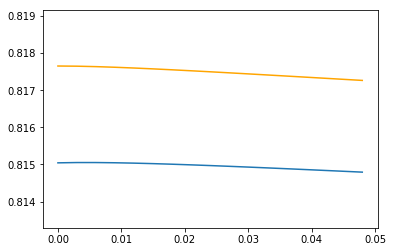

In [44]:
results_dict=enet_grid.cv_results_
print(results_dict["mean_test_score"],results_dict["mean_train_score"])
plt.ylim(min(results_dict["mean_test_score"]-0.0015),max(results_dict["mean_train_score"]+0.0015))
plt.plot(alpha,results_dict["mean_test_score"])
plt.plot(alpha,results_dict["mean_train_score"],c='orange')
#plt.ylim(0.8,.85)

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
predictions = ridge.predict(X_test)
MSE = np.sqrt(mean_squared_error(y_test, predictions))
r2 = ridge.score(X_test, y_test)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 346.44940735134713, R2: 0.8107908205883578


In [31]:
def Ridge_CV(X,y,test_size,seed):
    X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    alpha=np.arange(0.0,0.05,.003)
    print(alpha)

    Ridgecv = RidgeCV(alphas=alpha, cv=5, normalize=True)
    Ridgecv.fit(X_train, y_train)
    #lasso.set_params(alpha=lassocv.alpha_)
   #lasso.fit(X_train, y_train)
    print("Alpha=", Ridgecv.alpha_)
    print("best model coefficients:")
    print(Ridgecv.coef_)
    predictions = Ridgecv.predict(X_test)
    RMSE_test_ridgecv = np.sqrt(mean_squared_error(y_test, predictions))
    r2_ridgecv = Ridgecv.score(X_test, y_test)
    print(f"RMSE_Ridge_CV: {RMSE_test_ridgecv}, R2_Ridge_CV: {r2_ridgecv}")
    df_modelresults=pd.DataFrame(predictions,columns=['Ridge_CV_predicted'])
    return(df_modelresults,RMSE_test_ridgecv,r2_ridgecv)       


In [27]:
Ridge_CV_predicted,RMSE_Ridgecv_CV,R2_Ridge_CV=Ridge_CV(X,y,0.2,30)

[0.    0.003 0.006 0.009 0.012 0.015 0.018 0.021 0.024 0.027 0.03  0.033
 0.036 0.039 0.042 0.045 0.048]
Alpha= 0.0
best model coefficients:
[[ 4.97122045e+00  5.29064775e-02 -1.67178178e-01  3.11097907e-01
   1.09458854e+00  2.61256744e+00  3.06232885e+01  3.63068319e-02
  -4.11792513e-03 -1.09296910e-02 -2.07024244e-02 -1.63219554e-02
  -1.41786704e-02  1.42099992e-02 -1.90716284e-02 -4.33579373e+00
   9.67324103e-01 -1.26424095e+00 -1.23047668e+00 -3.35324908e+00
   2.43529883e+01  2.39261063e+00  2.32155854e-01 -4.53587647e+00
   3.07677297e+01  2.21377884e+00  3.14469637e+00  1.65132535e+01
   1.58687497e+00 -6.88119397e-02  8.34594771e-01 -1.00962819e+01
   2.31878710e+00  4.40376559e+00  1.29917768e+02  5.69586124e+00
   2.55147781e+01  1.64298766e+01  1.50344838e+01  3.70303948e+01
  -4.48790365e+00 -1.52724451e+01  1.92967128e+01 -4.36224277e+00
  -5.57885256e+00  2.35434288e+01  9.86065473e-02  1.10020087e+01
  -2.63972472e+01  8.40482537e+00  4.59789571e+00  3.76482678e+00
 

In [32]:
def classic_ridge_model(X_train,y_train, X_test,y_test):
    ridge = Ridge().fit(X_train, y_train)
    predictions_train = ridge.predict(X_train)
    RMSE_train = np.sqrt(mean_squared_error(y_train, predictions_train))
    r2_train = ridge.score(X_train, y_train)
    predictions = ridge.predict(X_test)
    RMSE_test_ridge = np.sqrt(mean_squared_error(y_test, predictions))
    r2_test_ridge= ridge.score(X_test, y_test)
    df_modelresults=pd.DataFrame(predictions,columns=['Classic_Ridge_predicted'])
    print(f"RMSE_classic_ridge={RMSE_test_ridge},R2_Classic_Ridge={r2_test_ridge}")
    return(df_modelresults, RMSE_test_ridge,r2_test_ridge)

In [33]:
classic_ridge_predicted,RMSE_classic_ridge,R2_ridge=classic_ridge_model(X_train,y_train, X_test,y_test)

RMSE_classic_ridge=346.44940735134713,R2_Classic_Ridge=0.8107908205883578
